# Visualization of velocity for video-confimed events - experiment 4
VRAcuityExp_2017-07-13_15-19-09_VR-2A_EDU

In [1]:
# data loading
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats, integrate

%matplotlib inline
sns.set(color_codes=True)

path = '../datasets/preprocessed/'
dfrat     = pd.read_hdf(path+'relationalDatabase.h5', 'Rat_Behavior').set_index('index')
dfevent   = pd.read_hdf(path+'relationalDatabase.h5', 'Events').set_index('index')
dfsession = pd.read_hdf(path+'relationalDatabase.h5', 'Sessions')

dfratclean = pd.read_hdf(path+'filteredDatabase.h5', 'Rat_Behavior').set_index('index')
dfratv = pd.read_hdf(path+'velocityDatabase.h5', 'Rat_Behavior').set_index('index')

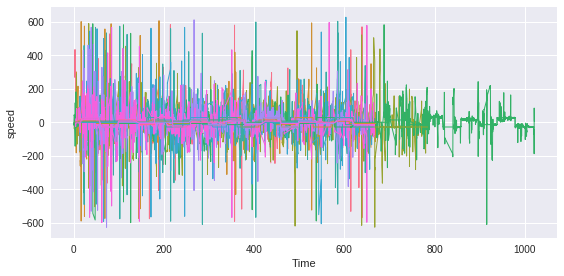

In [2]:
df = pd.merge(dfratv, dfevent, on=['Frame', 'session_id','Time'])
df['UM'] = df['U'].rolling(window=40).mean()

df['subU'] = df['speed'] - df['U'] 
df['subUM'] = df['speed'] - df['UM'] 

g = sns.FacetGrid(data=df, size=4, aspect=2, hue='session_id')
g.map(plt.plot, "Time", "subU", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);

In [3]:
dd2 = df[df['session_id']==4]

In [4]:
dfsession.video_name[4]

'VRAcuityExp_2017-07-13_15-19-09_VR-2A_EDU-Camera 11136'

Found SRB:
1. 181, 183
2. 184, 185
3. 221, 228
4. 267, 270
5. 287, 291


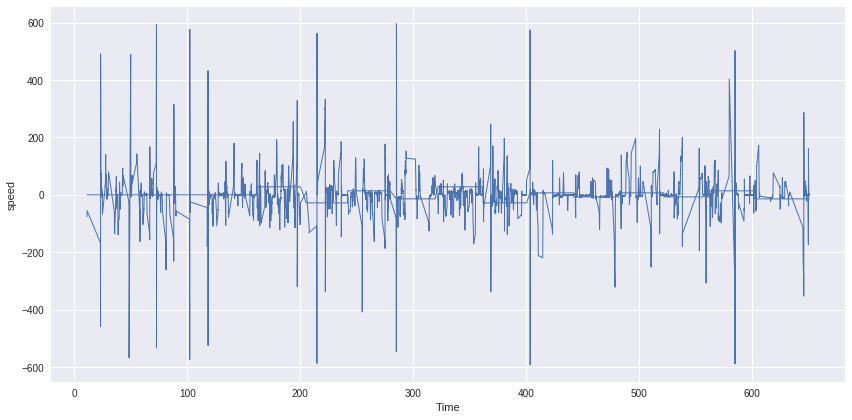

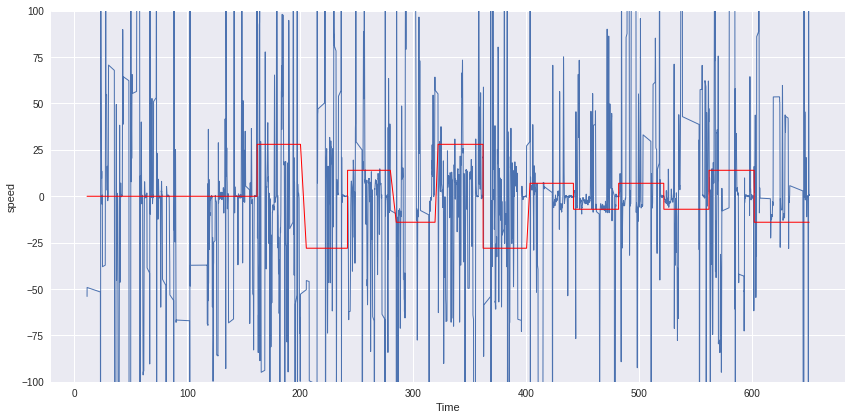

In [17]:
g = sns.FacetGrid(data=dd2, size=6, aspect=2)#, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);

g = sns.FacetGrid(data=dd2, size=6, aspect=2, ylim=[-100,100])
g.map(plt.plot, "Time", "UM", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1, color='red');


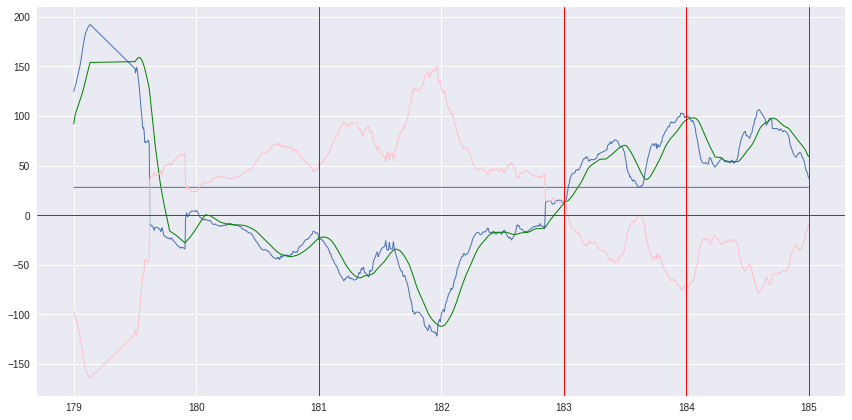

In [6]:
# 181, 183, 184, 185
dpart = dd2[(dd2['Time']>179) & (dd2['Time']<185)]
xmin, xmax =  181, 183

g = sns.FacetGrid(data=dpart, size=6, aspect=2)#, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "UM", alpha=1, linewidth=1, color='green');
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.plot, "Time", "subU", alpha=1, linewidth=1, color='pink');
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');

xmin, xmax =  184, 185
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');


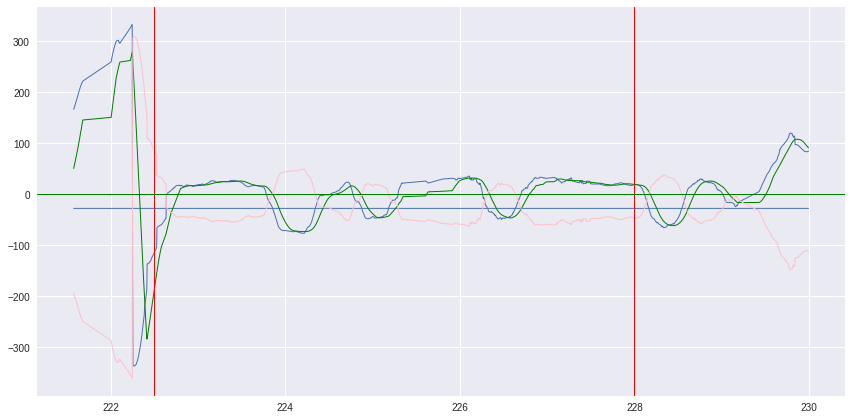

In [7]:
# 221, 228
dpart = dd2[(dd2['Time']>219) & (dd2['Time']<230)]
xmin, xmax = 222.5, 228

g = sns.FacetGrid(data=dpart, size=6, aspect=2)#, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.plot, "Time", "UM", alpha=1, linewidth=1, color='green');
g.map(plt.plot, "Time", "subU", alpha=1, linewidth=1, color='pink');
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');


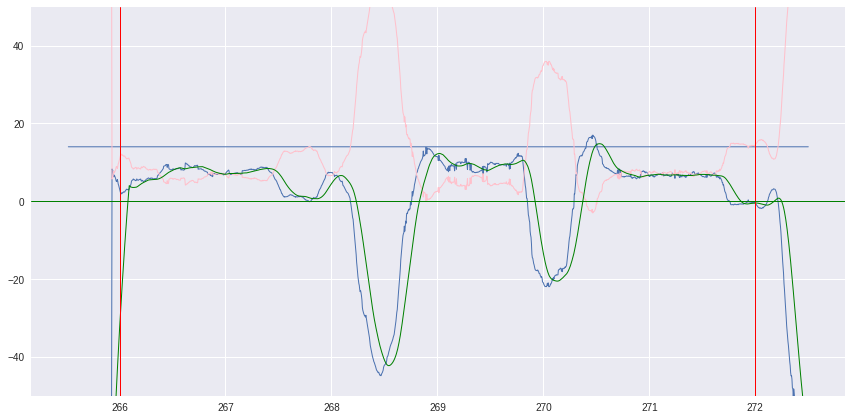

In [8]:
# 267, 270
dpart = dd2[(dd2['Time']>265) & (dd2['Time']<275)]
xmin, xmax = 266, 272

g = sns.FacetGrid(data=dpart, size=6, aspect=2, ylim=[-50,50])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.plot, "Time", "subU", alpha=1, linewidth=1, color='pink');
g.map(plt.plot, "Time", "UM", alpha=1, linewidth=1, color='green');

g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');


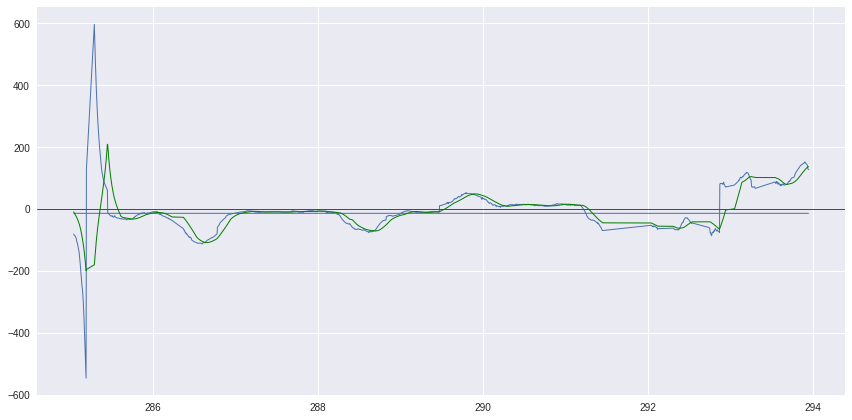

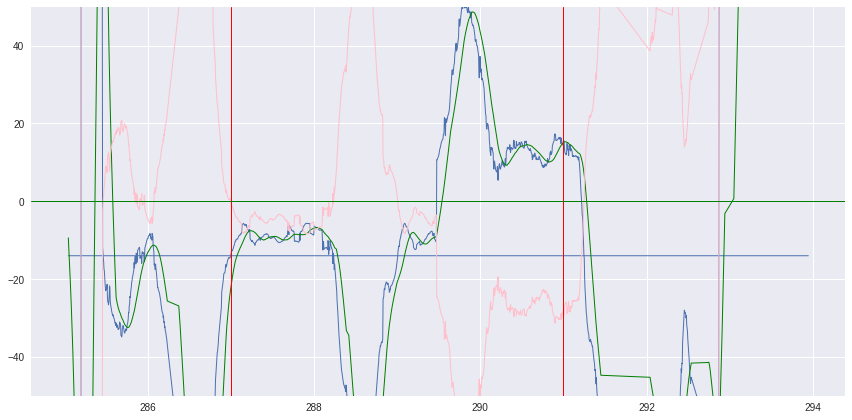

In [14]:
# 287, 291
dpart = dd2[(dd2['Time']>285) & (dd2['Time']<295)]
xmin, xmax = 287, 291

g = sns.FacetGrid(data=dpart, size=6, aspect=2)
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.plot, "Time", "UM", alpha=1, linewidth=1, color='green');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');

g = sns.FacetGrid(data=dpart, size=6, aspect=2, ylim=[-50,50])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.plot, "Time", "UM", alpha=1, linewidth=1, color='green');

g.map(plt.plot, "Time", "subU", alpha=1, linewidth=1, color='pink');
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');
